In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [3]:
conn = sqlite3.connect('../data/contactcars.db')

In [4]:
# Get list of tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,contactcars


In [5]:
def display_query_result(query):
    result = pd.read_sql_query(query, conn)
    display(HTML(result.to_html(index=False, classes='styled-table')))


In [6]:
# show table head
display_query_result("SELECT * FROM contactcars LIMIT 5;")

title,governorate,city,maker,model,model_year,mileage,car_type,price,minimum_down_payment,link
Opel vectre c 2008 أوبل فيكترا سي,Qalyubia,El Oobor,OPEL,Vectra,2008,350000.0,Automatic,450000.0,NaN,https://contactcars.com/en/used-cars/opel-vectra/7be4aad8e3b8?status=Used
هيونداي اكسنت 2015,Cairo,Nasr City,Hyundai,Accent,2015,200.0,Automatic,244000.0,NaN,https://contactcars.com/en/used-cars/hyundai-accent/96e4b12e05d8?status=Used
كيا سيفيا وان موديل 1997,Asyut,Dayrout,Kia,Sephia,1997,269000.0,Automatic,195000.0,NaN,https://contactcars.com/en/used-cars/kia-sephia/cf4c63443f0b?status=Used
بيجو301موديل2014,Cairo,Nasr City,Peugeot,301,2014,137000.0,Automatic,525000.0,NaN,https://contactcars.com/en/used-cars/peugeot-301/252af2f0150f?status=Used
Citroen c 5 air croos,Giza,Sheikh Zayed,Citroen,C5 Aircross,2021,62000.0,Automatic,1550000.0,310000.0,https://contactcars.com/en/used-cars/citroen-c5_aircross/5045f6dc67f9?status=Used


In [7]:
pd.options.display.float_format = '{:.2f}'.format

In [8]:
# Find table information
print("Table shape:",pd.read_sql_query("SELECT * FROM contactcars;", conn).shape )
print()
print("Column datatypes:")
pd.read_sql_query("SELECT * FROM contactcars;", conn).info()
print()
print("Summary statistics:")
print(pd.read_sql_query("SELECT * FROM contactcars;", conn).describe())

Table shape: (5447, 11)

Column datatypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447 entries, 0 to 5446
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5447 non-null   object 
 1   governorate           5447 non-null   object 
 2   city                  5447 non-null   object 
 3   maker                 5447 non-null   object 
 4   model                 5447 non-null   object 
 5   model_year            5447 non-null   int64  
 6   mileage               5447 non-null   float64
 7   car_type              5447 non-null   object 
 8   price                 5447 non-null   float64
 9   minimum_down_payment  1420 non-null   float64
 10  link                  5447 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 468.2+ KB

Summary statistics:
       model_year   mileage       price  minimum_down_payment
count     5447.00   5447.00     5447.00 

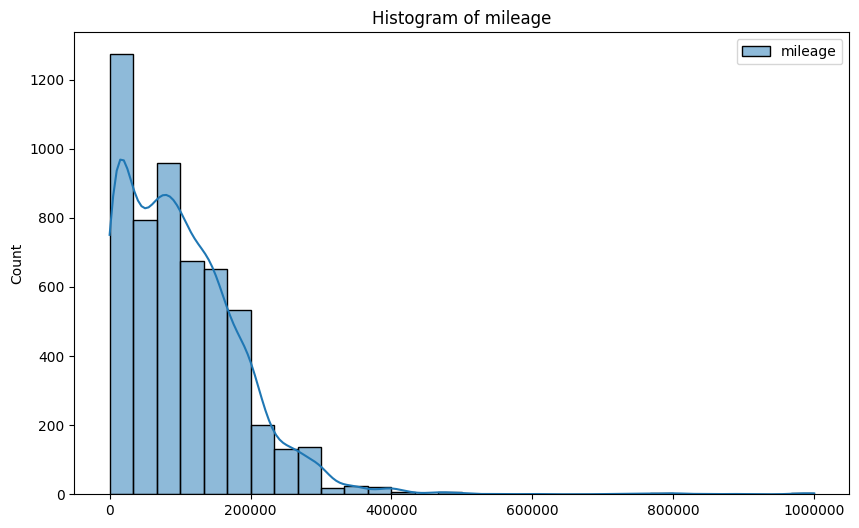

In [9]:
# Plot histogram distribution of the mileage
plt.figure(figsize=(10, 6))
sns.histplot(pd.read_sql_query("SELECT mileage FROM contactcars;", conn), bins=30, kde=True)
plt.title("Histogram of mileage")
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
plt.show()

In [10]:
# Find count outliers from the mileage
mileage = pd.read_sql_query("SELECT mileage FROM contactcars;", conn)
Q1 = mileage.quantile(0.25)
print("Q1:", Q1)
Q2 = mileage.quantile(0.5)
print("Q2:", Q2)
Q3 = mileage.quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1
outliers = mileage[(mileage < (Q1 - 1.5 * IQR)) | (mileage > (Q3 + 1.5 * IQR))]
print("Outliers count:")
print(outliers.count())

Q1: mileage   37000.00
Name: 0.25, dtype: float64
Q2: mileage   90000.00
Name: 0.5, dtype: float64
Q3: mileage   150000.00
Name: 0.75, dtype: float64
Outliers count:
mileage    89
dtype: int64


In [11]:
# remove outliers from the mileage
mileage = mileage[(mileage > (Q1 - 1.5 * IQR)) & (mileage < (Q3 + 1.5 * IQR))]

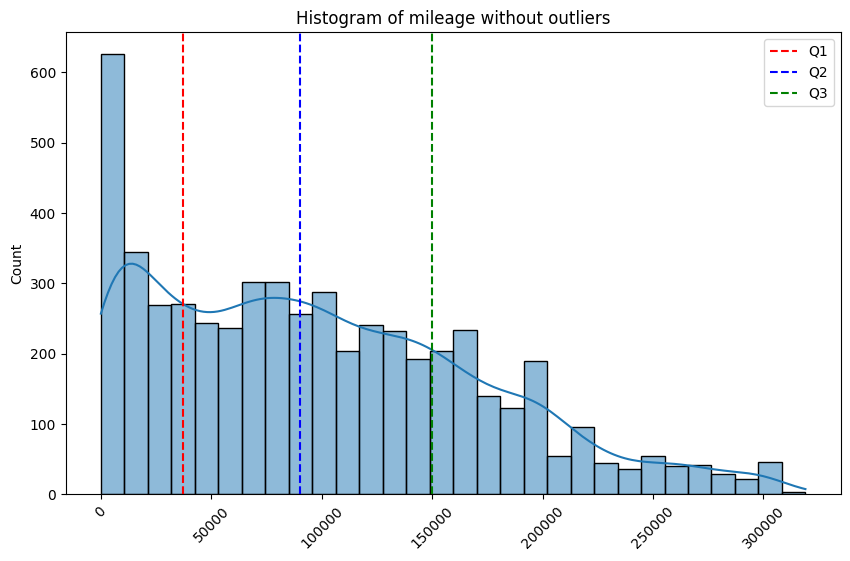

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(mileage, bins=30, kde=True)
plt.title("Histogram of mileage without outliers")
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# Add vertical lines for quartiles
plt.axvline(x=37000.00, color='r', linestyle='--', label='Q1')
plt.axvline(x=90000.00, color='b', linestyle='--', label='Q2')
plt.axvline(x=150000.00, color='g', linestyle='--', label='Q3')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

plt.show()

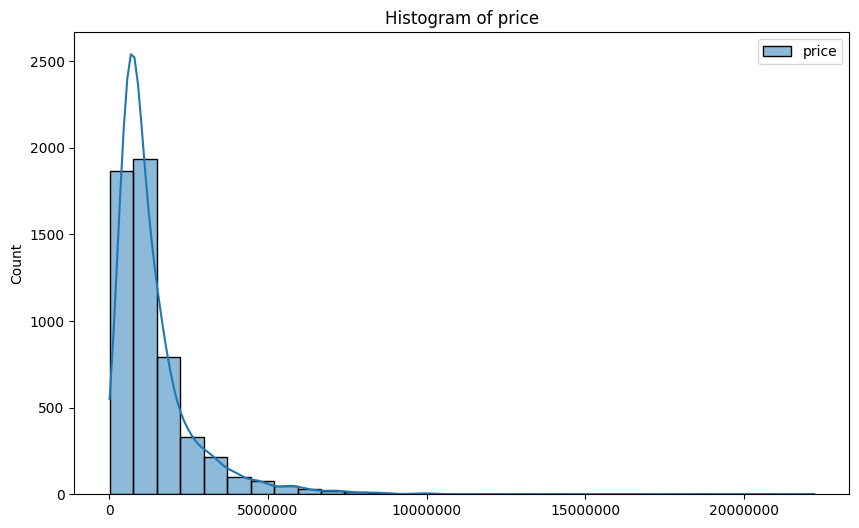

In [13]:
# Plot histogram distribution of the price
plt.figure(figsize=(10, 6))
sns.histplot(pd.read_sql_query("SELECT price FROM contactcars;", conn), bins=30, kde=True)
plt.title("Histogram of price")
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
plt.show()

In [14]:
# Find count outliers from the price
price = pd.read_sql_query("SELECT price FROM contactcars;", conn)
Q1 = price.quantile(0.25)
print("Q1:", Q1)
Q2 = price.quantile(0.5)
print("Q2:", Q2)
Q3 = price.quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1
outliers = price[(price < (Q1 - 1.5 * IQR)) | (price > (Q3 + 1.5 * IQR))]
print("Outliers count:")
print(outliers.count())                 

Q1: price   620000.00
Name: 0.25, dtype: float64
Q2: price   950000.00
Name: 0.5, dtype: float64
Q3: price   1650000.00
Name: 0.75, dtype: float64
Outliers count:
price    451
dtype: int64


In [15]:
# remove outliers from the price
price = price[(price > (Q1 - 1.5 * IQR)) & (price < (Q3 + 1.5 * IQR))]

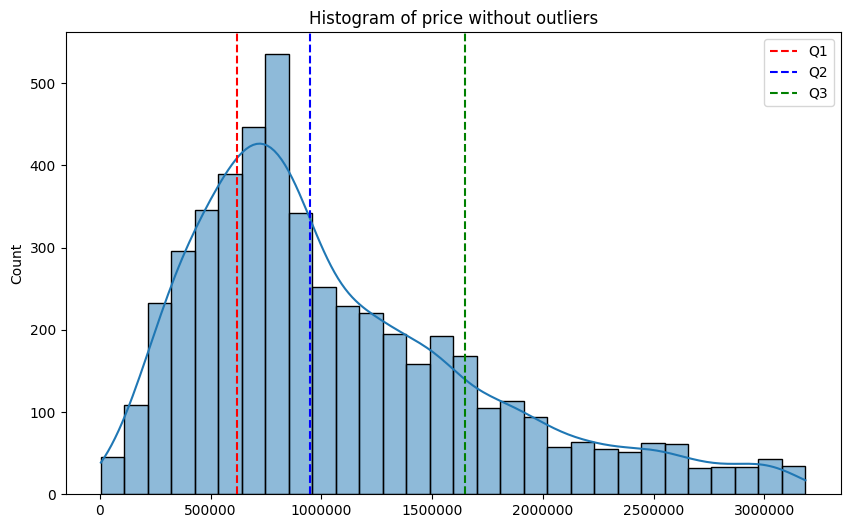

In [16]:
# Plot histogram distribution of the price without outliers
plt.figure(figsize=(10, 6))
sns.histplot(price, bins=30, kde=True)
plt.title("Histogram of price without outliers")
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# Add vertical lines for quartiles
plt.axvline(x=620000.00, color='r', linestyle='--', label='Q1')
plt.axvline(x=950000.00, color='b', linestyle='--', label='Q2')
plt.axvline(x=1650000.00, color='g', linestyle='--', label='Q3')

plt.legend()
plt.show()

In [17]:
# Find outliers from the model year
year = pd.read_sql_query("SELECT model_year FROM contactcars;", conn)
Q1 = year.quantile(0.25)
print("Q1:", Q1)
Q2 = year.quantile(0.5)
print("Q2:", Q2)
Q3 = year.quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1
outliers = year[(year < (Q1 - 1.5 * IQR)) | (year > (Q3 + 1.5 * IQR))]
print("Outliers count:")
print(outliers.count())

Q1: model_year   2014.00
Name: 0.25, dtype: float64
Q2: model_year   2019.00
Name: 0.5, dtype: float64
Q3: model_year   2021.00
Name: 0.75, dtype: float64
Outliers count:
model_year    191
dtype: int64


In [18]:
# remove outliers from the year
year = year[(year > (Q1 - 1.5 * IQR)) & (year < (Q3 + 1.5 * IQR))]

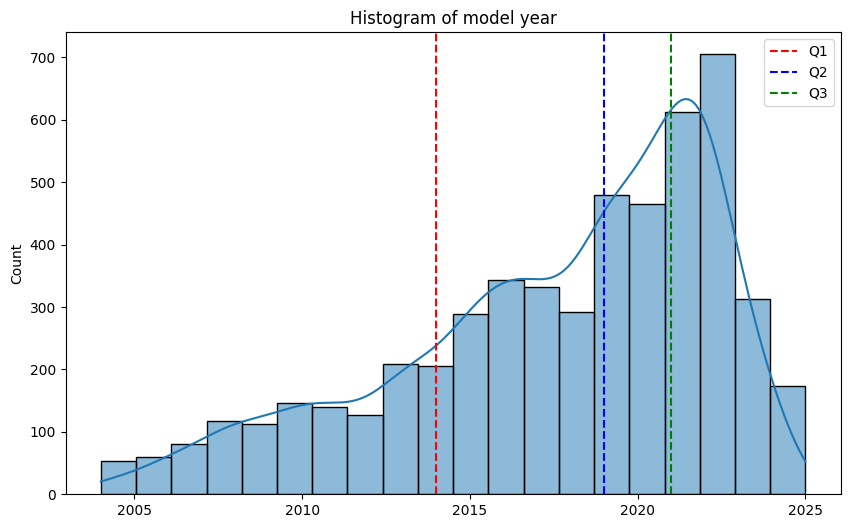

In [19]:
# Plot histogram distribution of the model year
plt.figure(figsize=(10, 6))
sns.histplot(year, bins=20, kde=True)
plt.title("Histogram of model year")

# Add vertical lines for quartiles
plt.axvline(x=2014.00, color='r', linestyle='--', label='Q1')
plt.axvline(x=2019.00, color='b', linestyle='--', label='Q2')
plt.axvline(x=2021.00, color='g', linestyle='--', label='Q3')

plt.legend()
plt.show()

In [20]:
# Most common car maker
display_query_result("SELECT maker, COUNT(*) as count FROM contactcars GROUP BY maker ORDER BY count DESC LIMIT 10;")

maker,count
Mercedes,643
BMW,447
Hyundai,397
Renault,358
Kia,358
Nissan,301
OPEL,228
Toyota,219
Chevrolet,218
Peugeot,192


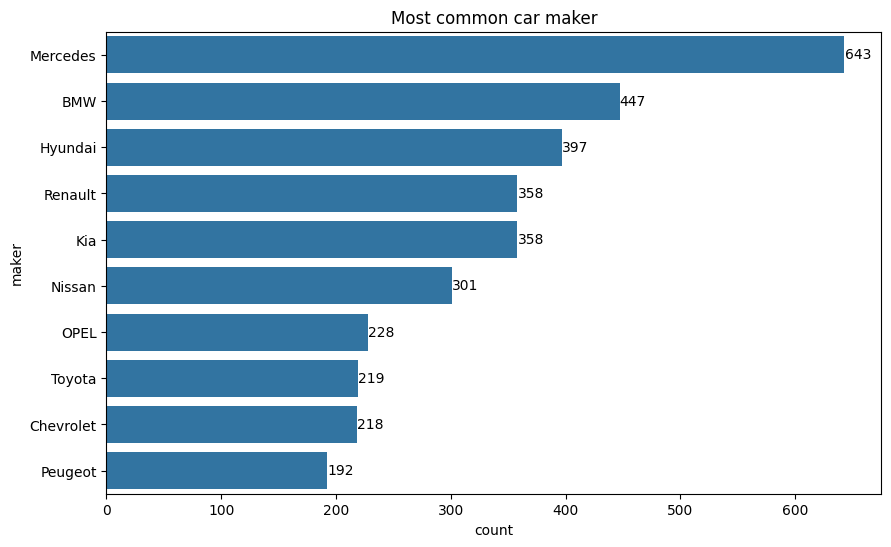

In [21]:
# plot the most common car maker
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='maker', data=pd.read_sql_query("SELECT maker FROM contactcars;", conn), order=pd.read_sql_query("SELECT maker, COUNT(*) as count FROM contactcars GROUP BY maker ORDER BY count DESC LIMIT 10;", conn)['maker'])
plt.title("Most common car maker")

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 0.2, p.get_y() + p.get_height() / 2), ha = 'left', va = 'center')

plt.show()

In [22]:
# The average price by top 10 most common car makers
query = """
WITH Top10CarMakers AS (
    SELECT maker, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY maker
    ORDER BY num_cars DESC
    LIMIT 10
)
SELECT t.maker, AVG(c.price) AS average_price
FROM contactcars c
JOIN Top10CarMakers t ON c.maker = t.maker
GROUP BY t.maker
ORDER BY average_price DESC;
"""
display_query_result(query)


maker,average_price
Mercedes,2867991.53
BMW,2252498.88
Toyota,1337762.56
Peugeot,1094857.29
Kia,996243.14
Hyundai,916790.93
OPEL,908798.25
Nissan,836332.23
Renault,745233.24
Chevrolet,608661.06


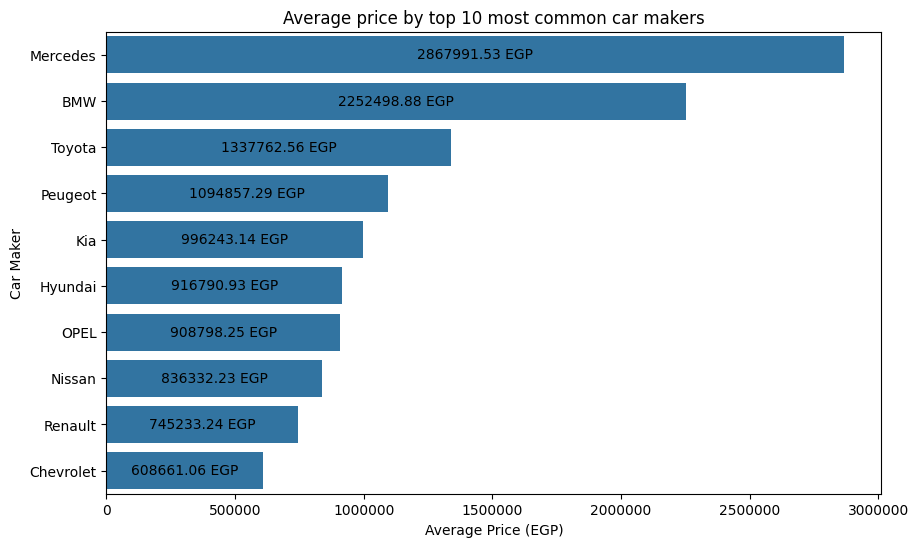

In [23]:
data = pd.read_sql_query(query, conn)

# Plot the average price by top 10 most common car makers
plt.figure(figsize=(10, 6))
sns.barplot(x='average_price', y='maker', data=data)

# Add price labels inside the bars
for index, row in data.iterrows():
    plt.text(x=row['average_price']/2, y=index, s=f"{row['average_price']:.2f} EGP", ha='center', va='center')

plt.title("Average price by top 10 most common car makers")
plt.xlabel("Average Price (EGP)")
plt.ylabel("Car Maker")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [24]:
query = """
SELECT maker || ' ' || model AS car, COUNT(*) AS count
FROM contactcars
GROUP BY car
ORDER BY count DESC
LIMIT 10;
"""
display_query_result(query)

car,count
Mercedes C180,198
Toyota Corolla,144
Nissan Sunny,141
Skoda Octavia,99
Mitsubishi Lancer,95
OPEL Astra,94
Fiat Tipo,87
Renault Megane,83
Kia Sportage,83
Kia Cerato,80


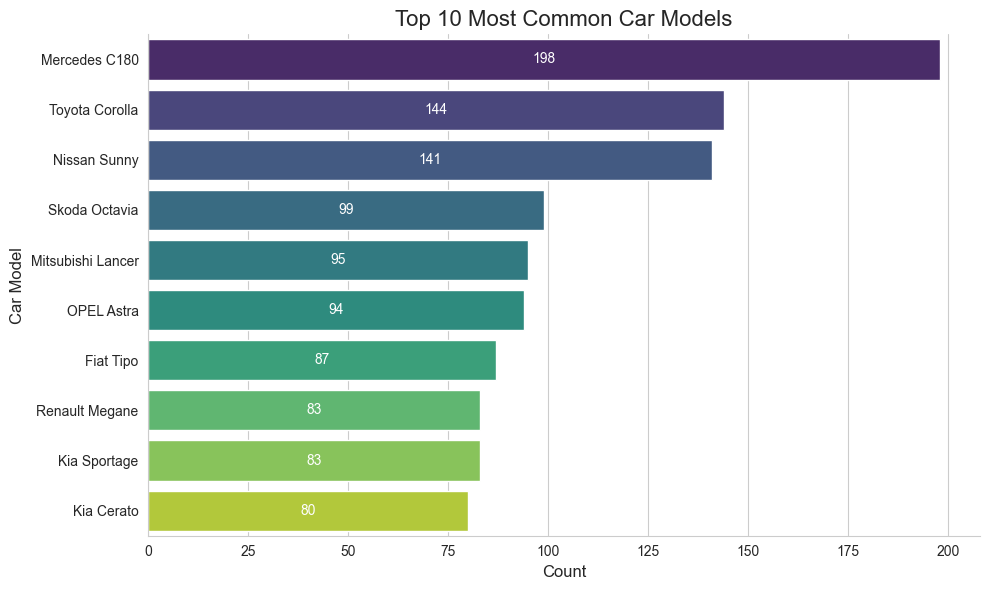

In [25]:
top_10_models = pd.read_sql_query(query, conn)
# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sns.barplot(x='count', y='car', data=top_10_models, ax=ax, palette='viridis', hue='car')

# Add count inside each bar
for index, row in top_10_models.iterrows():
    ax.text(x=row['count']/2, y=index, s=f"{row['count']}", ha='center', va='center', color='white')

# Set the title and labels
ax.set_title("Top 10 Most Common Car Models", fontsize=16)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Car Model", fontsize=12)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=10)

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# top 3 car models for each car maker from the top 10 most common car makers
query = """
WITH Top10CarMakers AS (
    SELECT maker, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY maker
    ORDER BY num_cars DESC
    LIMIT 10
),
RankedCarModels AS (
    SELECT 
        maker, 
        model, 
        COUNT(*) AS model_count,
        ROW_NUMBER() OVER(PARTITION BY maker ORDER BY COUNT(*) DESC) AS model_rank
    FROM contactcars
    WHERE maker IN (SELECT maker FROM Top10CarMakers)
    GROUP BY maker, model
)
SELECT 
    maker,
    MAX(CASE WHEN model_rank = 1 THEN model END) AS highest,
    MAX(CASE WHEN model_rank = 2 THEN model END) AS second,
    MAX(CASE WHEN model_rank = 3 THEN model END) AS third,
    SUM(CASE WHEN model_rank <= 3 THEN model_count ELSE 0 END) AS count
FROM RankedCarModels
GROUP BY maker
ORDER BY count DESC;
"""
display_query_result(query)

maker,highest,second,third,count
Mercedes,C180,C200,E200,339
Nissan,Sunny,Qashqai,Sentra,253
Renault,Megane,Logan,Kadjar,212
Kia,Sportage,Cerato,Picanto,199
Toyota,Corolla,Yaris,Fortuner,179
BMW,320i,318i,X3,170
OPEL,Astra,Insignia,Grand Land,158
Chevrolet,Optra,Aveo,Cruze,139
Hyundai,Tucson,Elantra HD,Elantra CN7,130
Peugeot,301,3008,508,127


In [27]:
# Find top 10 cities with the highest number of listings
query = """
SELECT city, COUNT(*) AS count
FROM contactcars
GROUP BY city
ORDER BY count DESC
LIMIT 10;
"""
display_query_result(query)

city,count
New Cairo & 5th Settlement,965
Nasr City,630
Heliopolis,448
6th of October,355
Sheikh Zayed,352
Maadi,182
El Sherouk City,147
El Haram,139
Madinaty,124
Mokattam,96


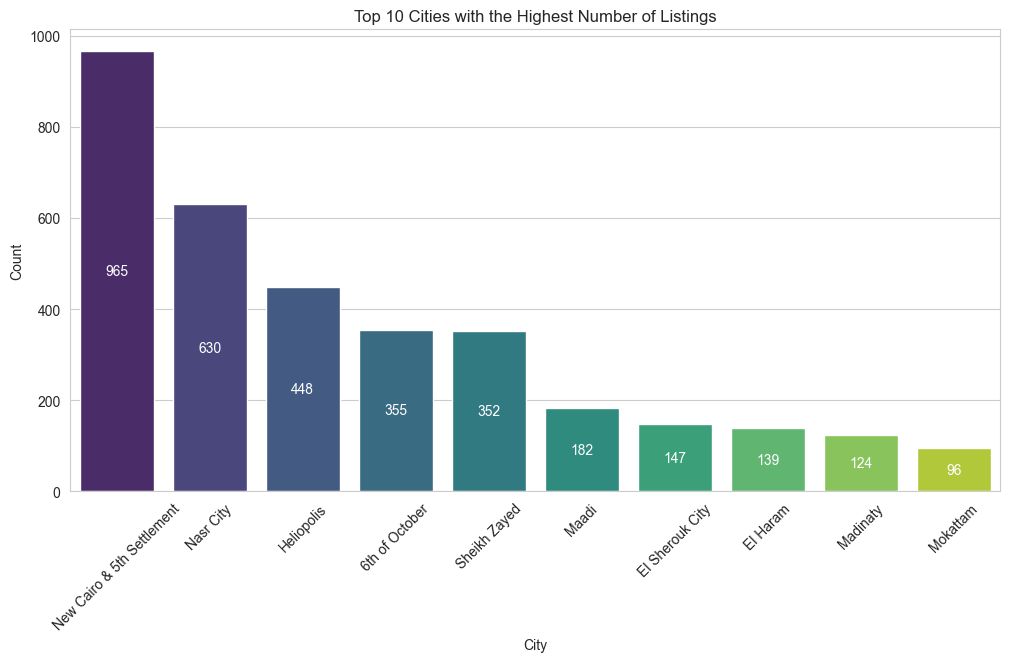

In [28]:
# Plot top 10 cities with the highest number of listings
data = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='count', data=data, palette='viridis', hue='city')

# Add count labels inside the bars
for index, row in data.iterrows():
    plt.text(x=index, y=row['count']/2, s=f"{row['count']}", ha='center', va='center', color='white')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.title("Top 10 Cities with the Highest Number of Listings")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

In [29]:
# Find the average price of cars in the top 10 cities with the highest number of listings
query = """
WITH Top10Cities AS (
    SELECT city, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY city
    ORDER BY num_cars DESC
    LIMIT 10
)
SELECT t.city, AVG(c.price) AS average_price
FROM contactcars c
JOIN Top10Cities t ON c.city = t.city
GROUP BY t.city
ORDER BY average_price DESC;
"""
display_query_result(query)

city,average_price
New Cairo & 5th Settlement,1960303.62
Sheikh Zayed,1751144.89
Madinaty,1638387.10
Heliopolis,1536300.28
6th of October,1309408.45
El Sherouk City,1300013.60
Nasr City,1286535.80
Maadi,1279335.16
Mokattam,1000729.17
El Haram,870076.63


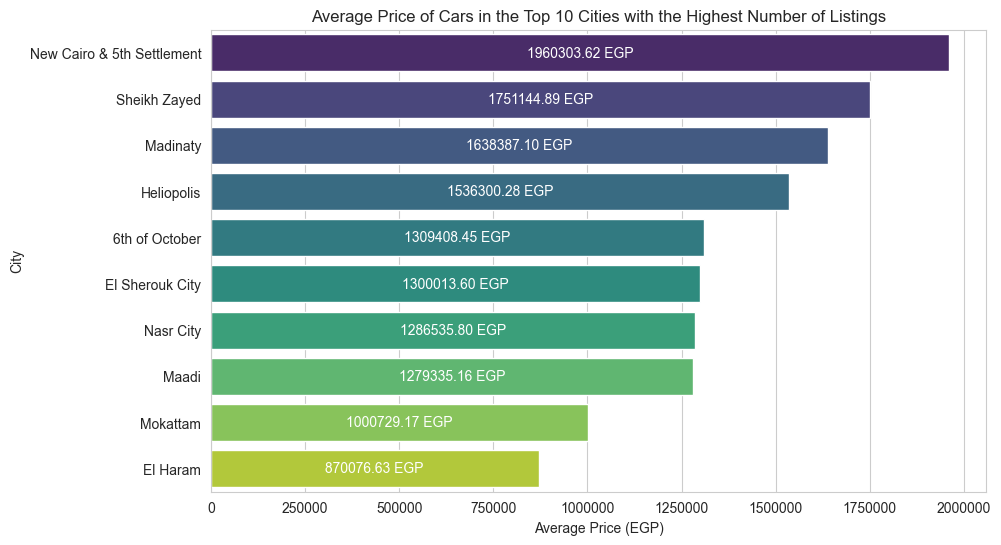

In [30]:
# Plot the average price of cars in the top 10 cities with the highest number of listings
data = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='average_price', y='city', data=data, palette='viridis', hue='city')

# Add price labels inside the bars
for index, row in data.iterrows():
    plt.text(x=row['average_price']/2, y=index, s=f"{row['average_price']:.2f} EGP", ha='center', va='center', color='white')
    
plt.title("Average Price of Cars in the Top 10 Cities with the Highest Number of Listings")
plt.xlabel("Average Price (EGP)")
plt.ylabel("City")
plt.ticklabel_format(style='plain', axis='x')
plt.show()


In [61]:
# Find the percentage of cars listed in Top 5 Governorates
query = """
WITH Top5Governorates AS (
    SELECT governorate, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY governorate
    ORDER BY num_cars DESC
    LIMIT 5
)
SELECT tg.governorate, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM contactcars WHERE governorate IN (SELECT governorate FROM Top5Governorates)) AS percentage
FROM contactcars cc
JOIN Top5Governorates tg ON cc.governorate = tg.governorate
GROUP BY tg.governorate
ORDER BY percentage DESC;
"""
display_query_result(query)

governorate,percentage
Cairo,64.55
Giza,23.77
Alexandria,6.48
Qalyubia,2.69
Eastern,2.51


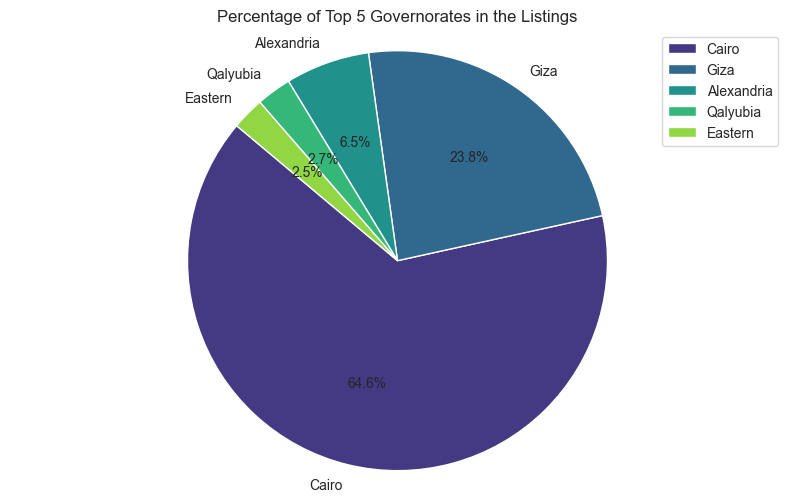

In [32]:
# Plot the percentage of each governorate in the listings as a pie chart
data = pd.read_sql_query(query, conn)

# Set the color palette
colors = sns.color_palette('viridis', len(data))

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(data['percentage'], labels=data['governorate'], autopct='%1.1f%%', startangle=140, colors=colors)

# Add a title and legend
plt.title("Percentage of Top 5 Governorates in the Listings")
plt.legend(data['governorate'], loc='best')

# Set the aspect ratio to make the pie chart circular
plt.axis('equal')

# Remove the unnecessary y-axis label
plt.ylabel('')

# Show the plot
plt.show()


In [41]:
query = """
WITH total_count AS (
    SELECT COUNT(*) as total_count
    FROM contactcars
    WHERE maker IN ('Geely', 'JAC', 'BYD', 'Chery', 'Brilliance', 'Proton', 'Great Wall', 'FAW', 'Haval', 'Bestune', 'Senova', 'BAIC', 'Dongfeng')
)

SELECT maker, COUNT(*) * 100.0 / total_count.total_count as percentage
FROM contactcars, total_count
WHERE maker IN ('Geely', 'JAC', 'BYD', 'Chery', 'Brilliance', 'Proton', 'Great Wall', 'FAW', 'Haval', 'Bestune', 'Senova', 'BAIC', 'Dongfeng')
GROUP BY maker
ORDER BY percentage DESC
LIMIT 5;
"""
display_query_result(query)

maker,percentage
Chery,42.76
BYD,14.83
Geely,10.34
JAC,10.00
Proton,9.66


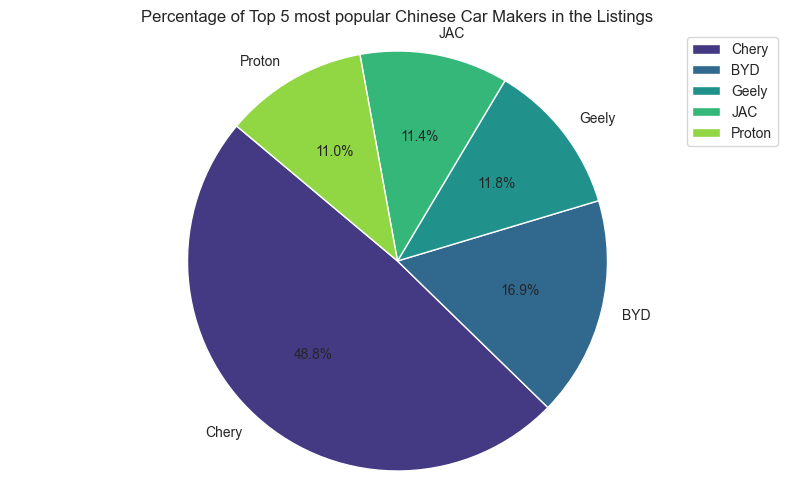

In [44]:
# Plot the percentage of each Top 5 most popular Chinese car maker in the listings as a pie chart
data = pd.read_sql_query(query, conn )

# Set the color palette
colors = sns.color_palette('viridis', len(data))

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(data['percentage'], labels=data['maker'], autopct='%1.1f%%', startangle=140, colors=colors)

# Add a title and legend
plt.title("Percentage of Top 5 most popular Chinese Car Makers in the Listings")
plt.legend(data['maker'], loc='best')

# Set the aspect ratio to make the pie chart circular
plt.axis('equal')

# Remove the unnecessary y-axis label
plt.ylabel('')
plt.show()

In [47]:
# Average mileage per car maker
query = """
WITH Top10CarMakers AS (
    SELECT maker, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY maker
    ORDER BY num_cars DESC
    LIMIT 10
)
SELECT t.maker, AVG(mileage) AS average_mileage
FROM contactcars c
JOIN Top10CarMakers t ON c.maker = t.maker
GROUP BY t.maker
ORDER BY average_mileage DESC;
"""
display_query_result(query)

maker,average_mileage
Toyota,126446.34
Chevrolet,121537.89
OPEL,117989.55
Renault,114900.00
BMW,111618.75
Nissan,110816.55
Kia,108802.57
Hyundai,107196.82
Peugeot,99367.53
Mercedes,68340.47


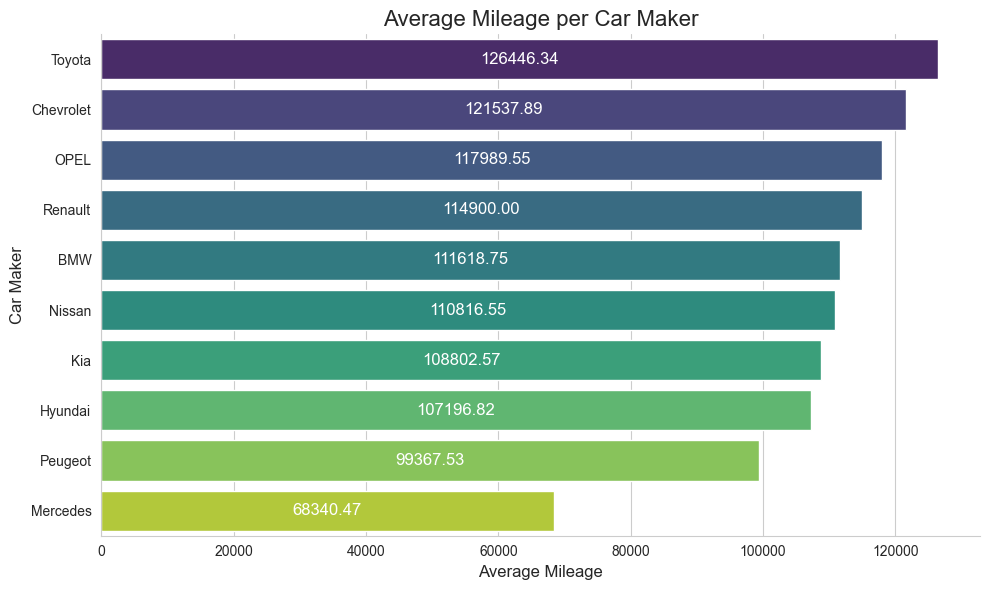

In [50]:
data = pd.read_sql_query(query, conn)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart with a different color palette
sns.barplot(x='average_mileage', y='maker', data=data, ax=ax, palette='viridis', hue='maker', legend=False)

# Add mileage labels inside the bars with a different font size and color
for index, row in data.iterrows():
    ax.text(x=row['average_mileage']/2, y=index, s=f"{row['average_mileage']:.2f}", ha='center', va='center', fontsize=12, color='white')

# Set the title and labels with a different font size
ax.set_title("Average Mileage per Car Maker", fontsize=16)
ax.set_xlabel("Average Mileage", fontsize=12)
ax.set_ylabel("Car Maker", fontsize=12)

# Customize the tick labels with a different font size
ax.tick_params(axis='both', labelsize=10)

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [56]:
query = """
WITH Top10Cities AS (
    SELECT city, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY city
    ORDER BY num_cars DESC
    LIMIT 10
),
RankedCarMakers AS (
    SELECT t.city, c.maker, COUNT(*) AS count,
        ROW_NUMBER() OVER(PARTITION BY t.city ORDER BY COUNT(*) DESC) AS rank
    FROM contactcars c
    JOIN Top10Cities t ON c.city = t.city
    GROUP BY t.city, c.maker
)
SELECT city, maker, count
FROM RankedCarMakers
WHERE rank = 1;
"""
display_query_result(query)

city,maker,count
New Cairo & 5th Settlement,Mercedes,191
Heliopolis,Mercedes,86
Nasr City,Mercedes,83
Sheikh Zayed,Mercedes,61
6th of October,Mercedes,33
Maadi,Mercedes,24
El Sherouk City,Mercedes,21
El Haram,Hyundai,18
Madinaty,Mercedes,13
Mokattam,Kia,12


In [59]:
query = """
WITH Top10Governorates AS (
    SELECT governorate, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY governorate
    ORDER BY num_cars DESC
    LIMIT 10
),
RankedCarMakers AS (
    SELECT tg.governorate, c.maker, COUNT(*) AS count,
        ROW_NUMBER() OVER(PARTITION BY tg.governorate ORDER BY COUNT(*) DESC) AS rank
    FROM contactcars c
    JOIN Top10Governorates tg ON c.governorate = tg.governorate
    GROUP BY tg.governorate, c.maker
)
SELECT governorate, maker, count
FROM RankedCarMakers
WHERE rank = 1;
"""
display_query_result(query)

governorate,maker,count
Alexandria,Renault,27
Cairo,Mercedes,459
Dakahlia,Kia,8
Eastern,Toyota,15
El Beheira,Hyundai,5
Giza,Mercedes,121
Monufia,Hyundai,9
Port Said,Hyundai,8
Qalyubia,Kia,12
Western,Hyundai,11


In [62]:
# Find the average mileage of cars in the top 10 cities with the highest number of listings
query = """
WITH Top10Cities AS (
    SELECT city, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY city
    ORDER BY num_cars DESC
    LIMIT 10
)
SELECT t.city, AVG(c.mileage) AS average_mileage
FROM contactcars c
JOIN Top10Cities t ON c.city = t.city
GROUP BY t.city
ORDER BY average_mileage DESC;
"""
display_query_result(query)

city,average_mileage
El Sherouk City,129211.46
Mokattam,121038.80
6th of October,118196.35
El Haram,109102.16
Madinaty,107398.87
Maadi,103685.28
Heliopolis,96798.95
Sheikh Zayed,96164.29
Nasr City,95350.34
New Cairo & 5th Settlement,92623.57


In [63]:
# Find the average mileage of cars in the top 10 governorates with the highest number of listings
query = """
WITH Top10Governorates AS (
    SELECT governorate, COUNT(*) AS num_cars
    FROM contactcars
    GROUP BY governorate
    ORDER BY num_cars DESC
    LIMIT 10
)
SELECT tg.governorate, AVG(c.mileage) AS average_mileage
FROM contactcars c
JOIN Top10Governorates tg ON c.governorate = tg.governorate
GROUP BY tg.governorate
ORDER BY average_mileage DESC;
"""
display_query_result(query)

governorate,average_mileage
Qalyubia,146492.00
Dakahlia,118631.71
Eastern,118458.03
Port Said,115162.84
Giza,109424.76
Cairo,100676.58
Monufia,100163.21
Alexandria,96679.12
El Beheira,94264.24
Western,91301.80
